In [69]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Define the path to your CSV file
file_path = 'C:\\Users\\seanm\\Downloads\\CarPrice_Assignment.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [73]:
print(df.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [75]:
# Get the dimensions of the DataFrame
dimensions = df.shape
print(dimensions)

(205, 26)


In [77]:
# Handle missing values: Fill with 0 or another strategy
df = df.fillna(0)

In [79]:
# Encode Categorical Variables using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [81]:
print(df.head())

   car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3        2         1           0           1        0   
1       2          3        3         1           0           1        0   
2       3          1        1         1           0           1        2   
3       4          2        4         1           0           0        3   
4       5          2        5         1           0           0        3   

   drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           2               0       88.6  ...         130           5   
1           2               0       88.6  ...         130           5   
2           2               0       94.5  ...         152           5   
3           1               0       99.8  ...         109           5   
4           0               0       99.4  ...         136           5   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68            

In [83]:
# Define the Dependent and Independent Variables
# Replace 'price' with the actual name of your dependent variable column
y = df['price']
X = df.drop('price', axis=1)

In [85]:
# Add a constant to the model
X = sm.add_constant(X)

In [87]:
# Fit the OLS model
model = sm.OLS(y, X).fit()

In [89]:
#Print the Summary of the Model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     64.23
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           5.48e-76
Time:                        20:18:38   Log-Likelihood:                -1896.8
No. Observations:                 205   AIC:                             3846.
Df Residuals:                     179   BIC:                             3932.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.491e+04   1.75e+04  

In [91]:
#Evaluate the Model
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6370147.838581599
R-squared: 0.8996991951465766


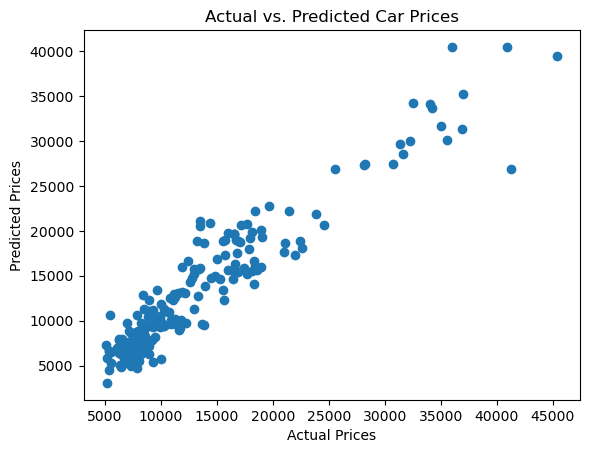

In [93]:
#Generate and save the plot
plt.scatter(y, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Car Prices')
plt.show()

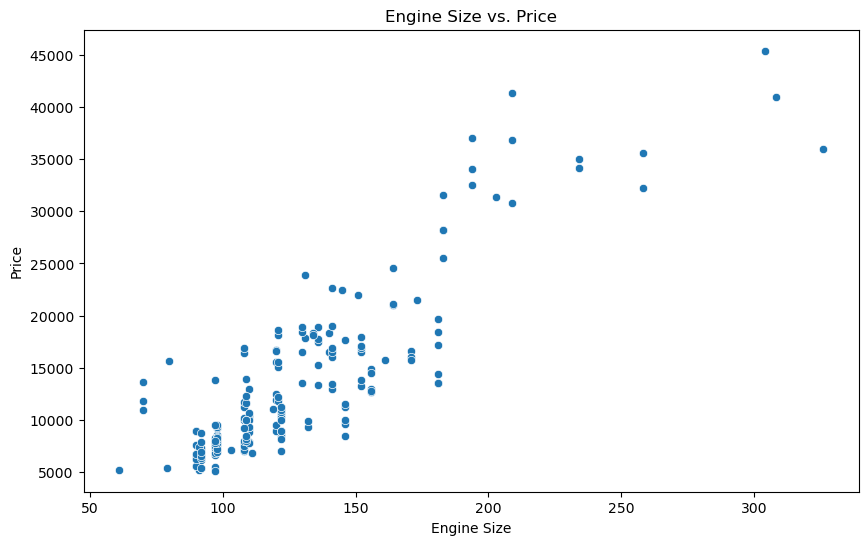

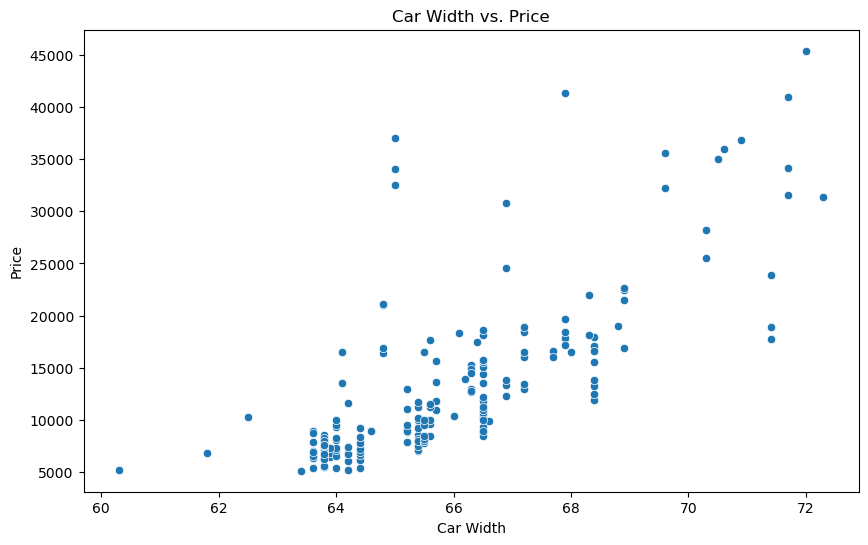

In [95]:
# Scatter plot for engine size vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='enginesize', y='price', data=df)
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

# Scatter plot for car width vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carwidth', y='price', data=df)
plt.title('Car Width vs. Price')
plt.xlabel('Car Width')
plt.ylabel('Price')
plt.show()

In [97]:
print(df.head())

   car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3        2         1           0           1        0   
1       2          3        3         1           0           1        0   
2       3          1        1         1           0           1        2   
3       4          2        4         1           0           0        3   
4       5          2        5         1           0           0        3   

   drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           2               0       88.6  ...         130           5   
1           2               0       88.6  ...         130           5   
2           2               0       94.5  ...         152           5   
3           1               0       99.8  ...         109           5   
4           0               0       99.4  ...         136           5   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68            

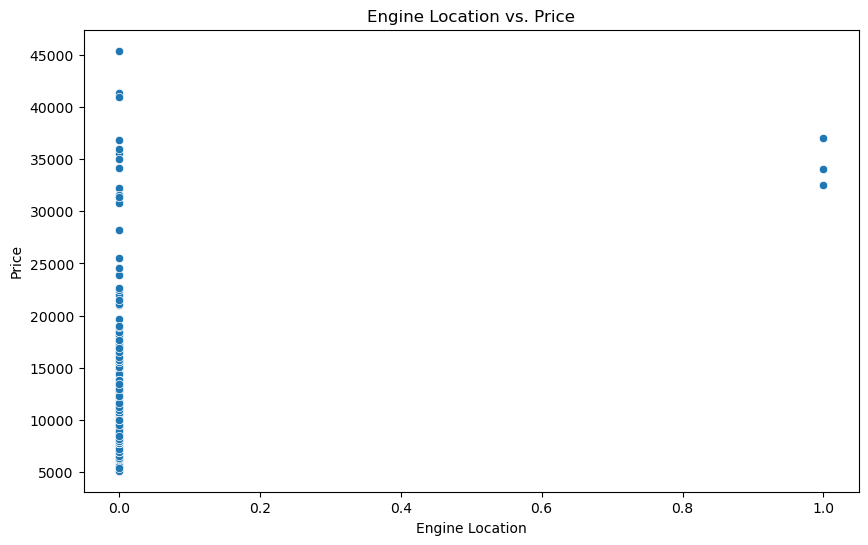

In [103]:
# Scatter plot for engine location vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='enginelocation', y='price', data=df)
plt.title('Engine Location vs. Price')
plt.xlabel('Engine Location')
plt.ylabel('Price')
plt.show()

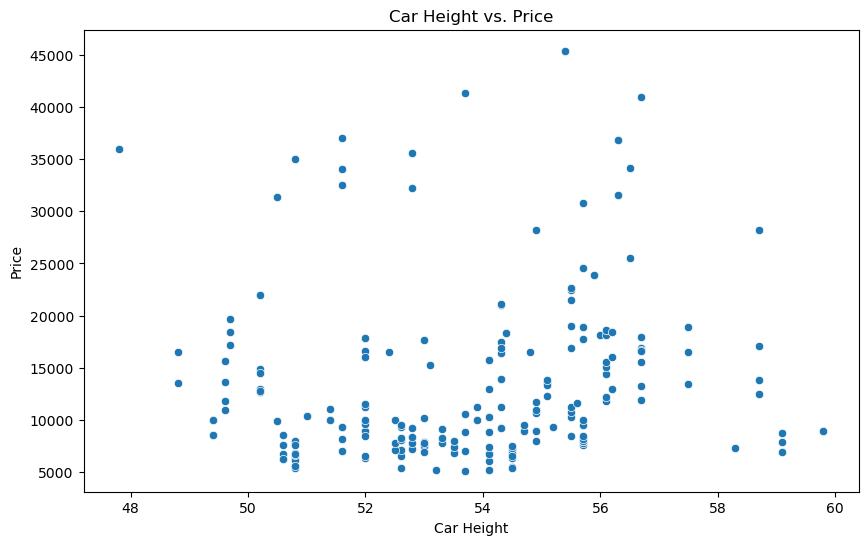

In [105]:
# Scatter plot for car height vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carheight', y='price', data=df)
plt.title('Car Height vs. Price')
plt.xlabel('Car Height')
plt.ylabel('Price')
plt.show()